<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd

df = pd.read_csv('Bank_Churn.csv')

In [28]:
# Remove irrelevant columns
df = df.drop(columns=['Surname', 'CustomerId'])

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())


# Check for and remove duplicate rows
df.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {len(df)}")

Missing values per column:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
Number of rows after removing duplicates: 10000


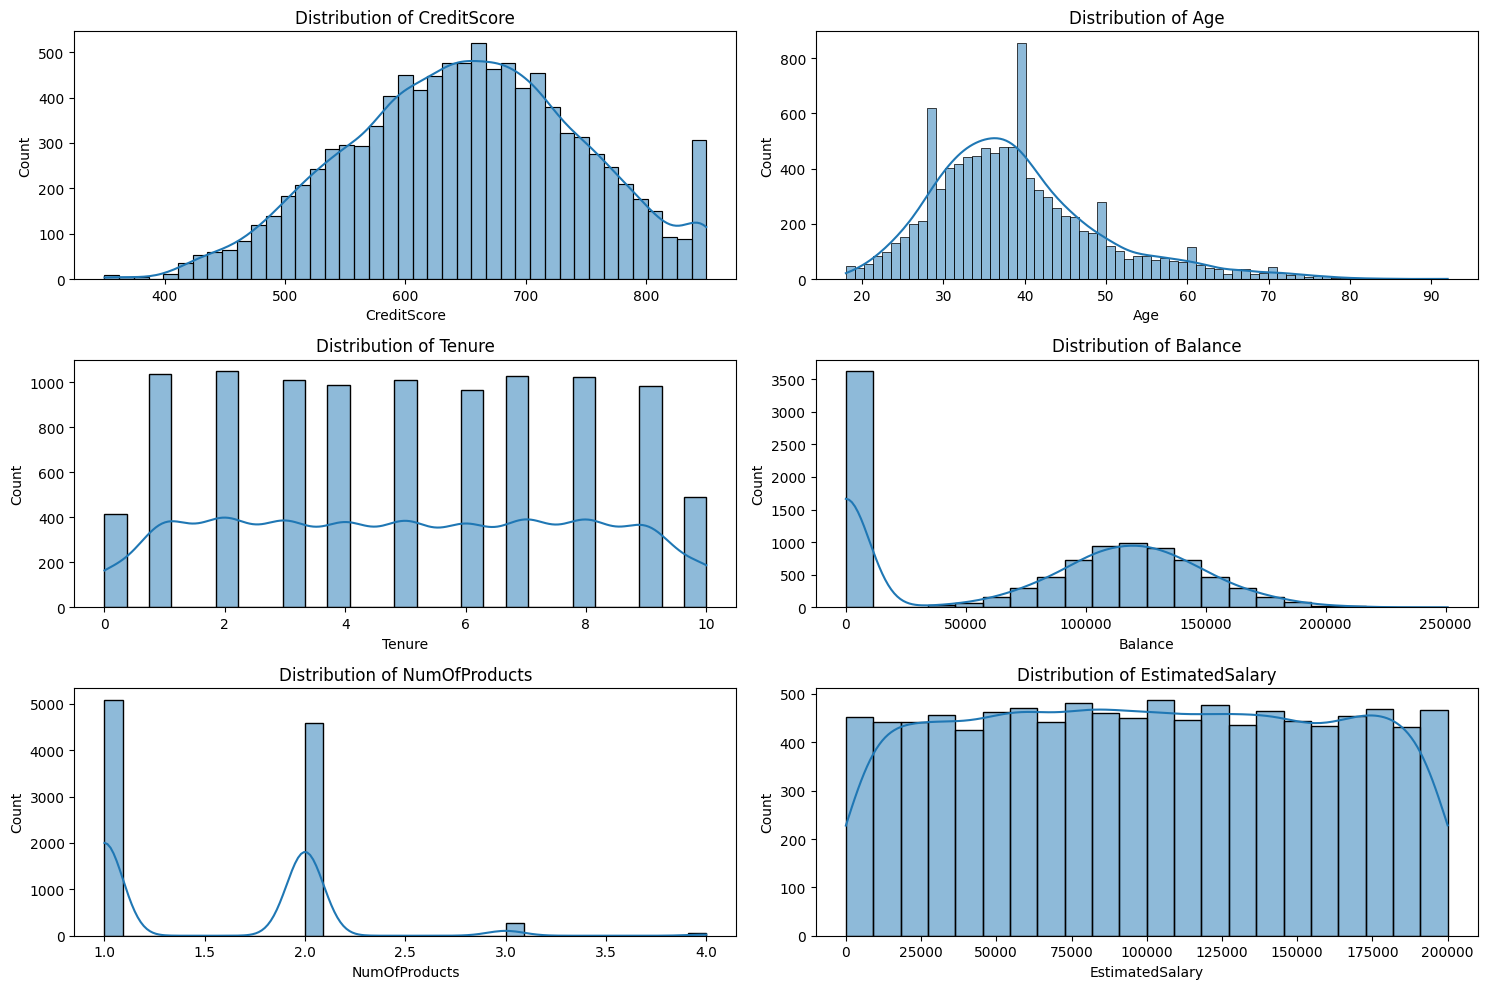

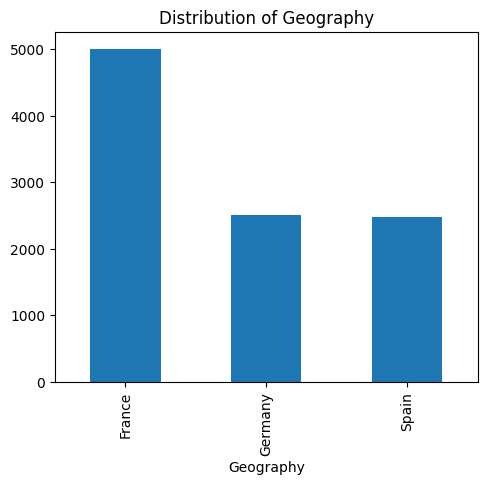

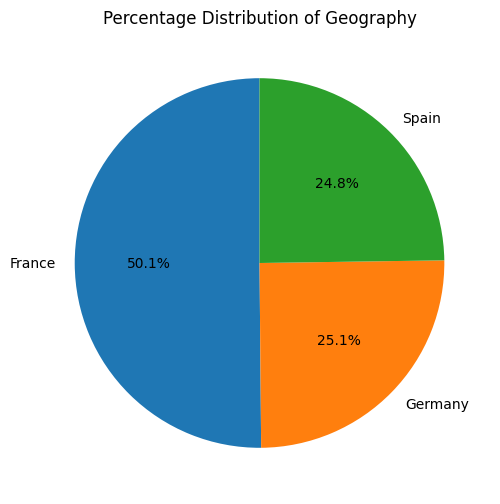

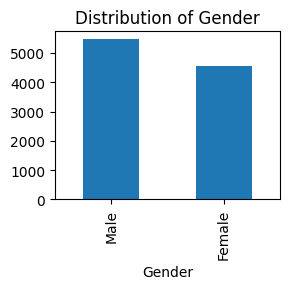

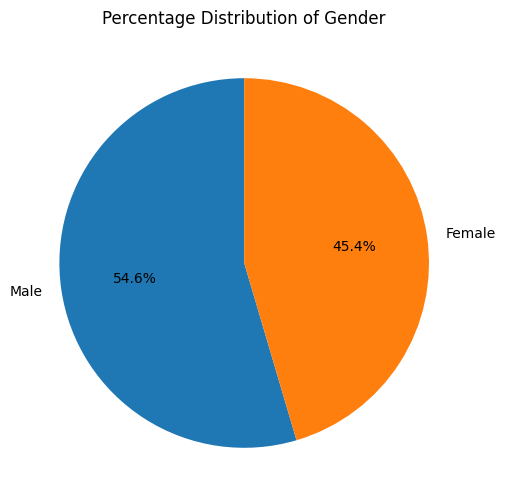

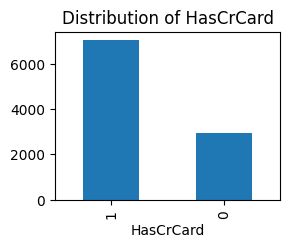

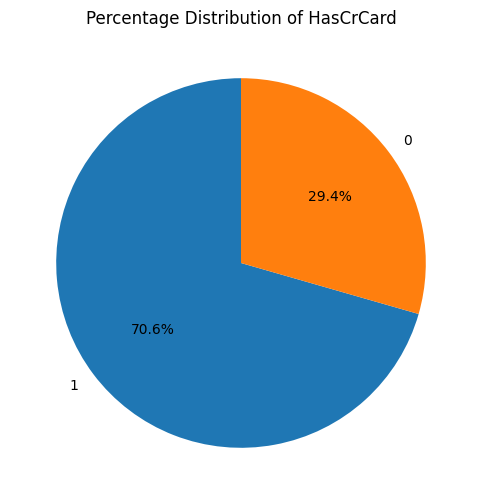

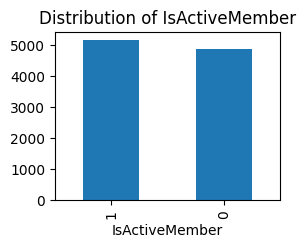

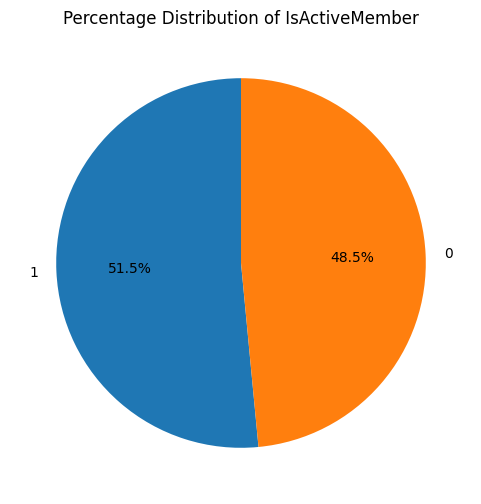

<Figure size 640x480 with 0 Axes>

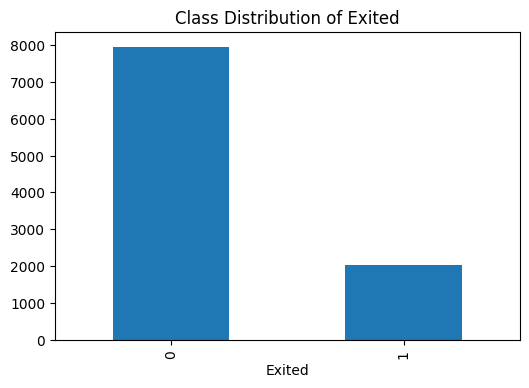

Percentage of churned customers: 20.37%


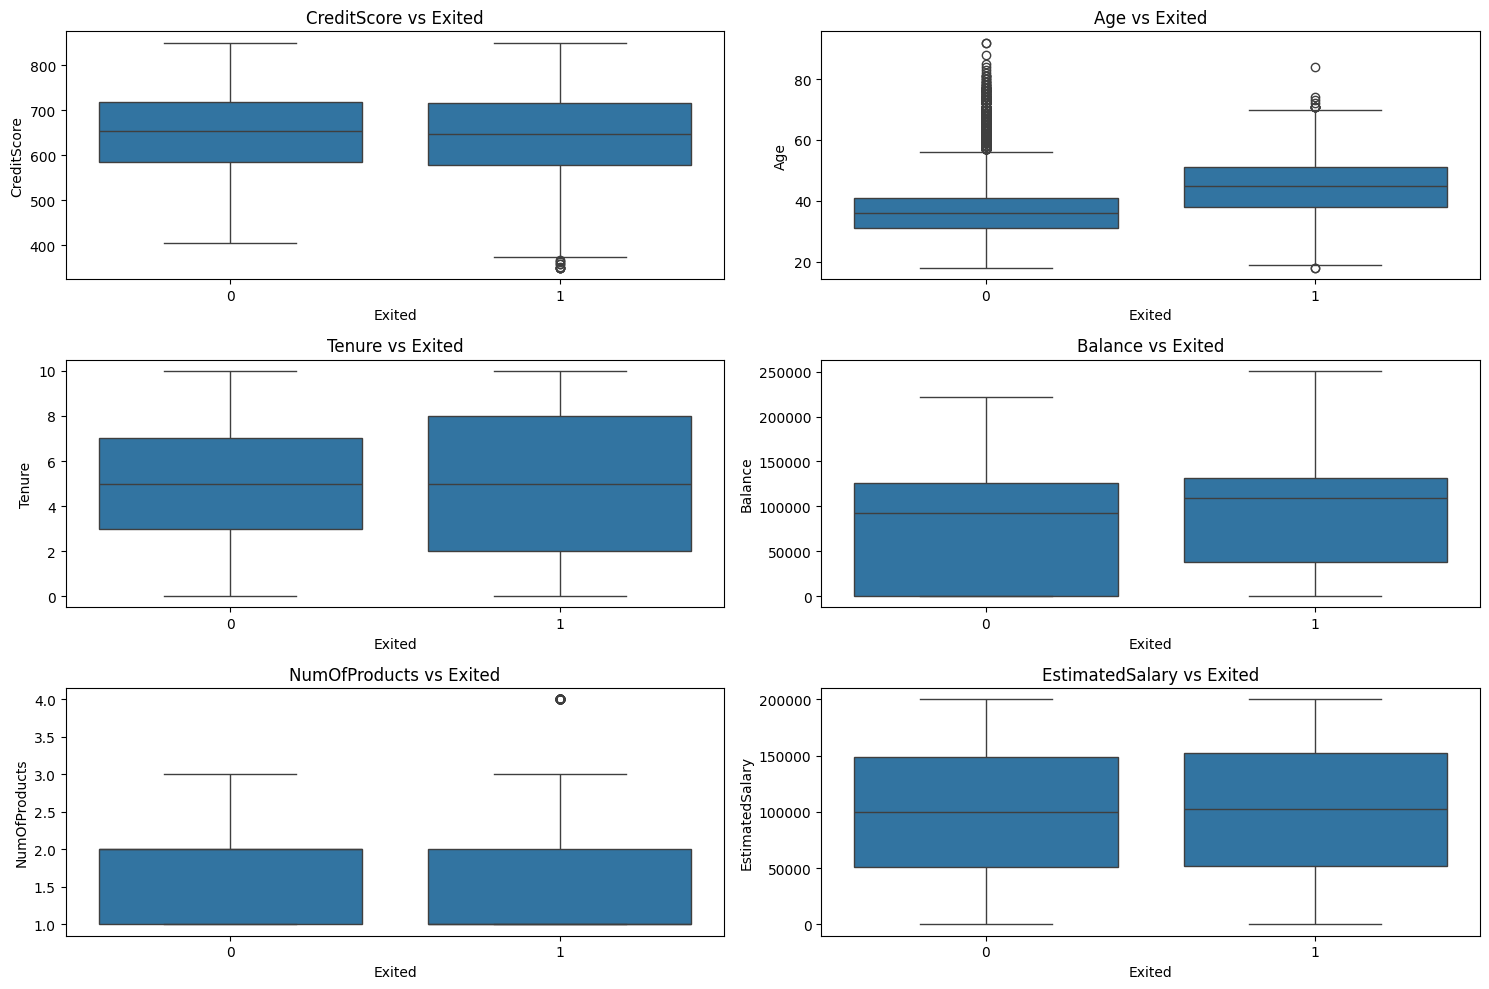

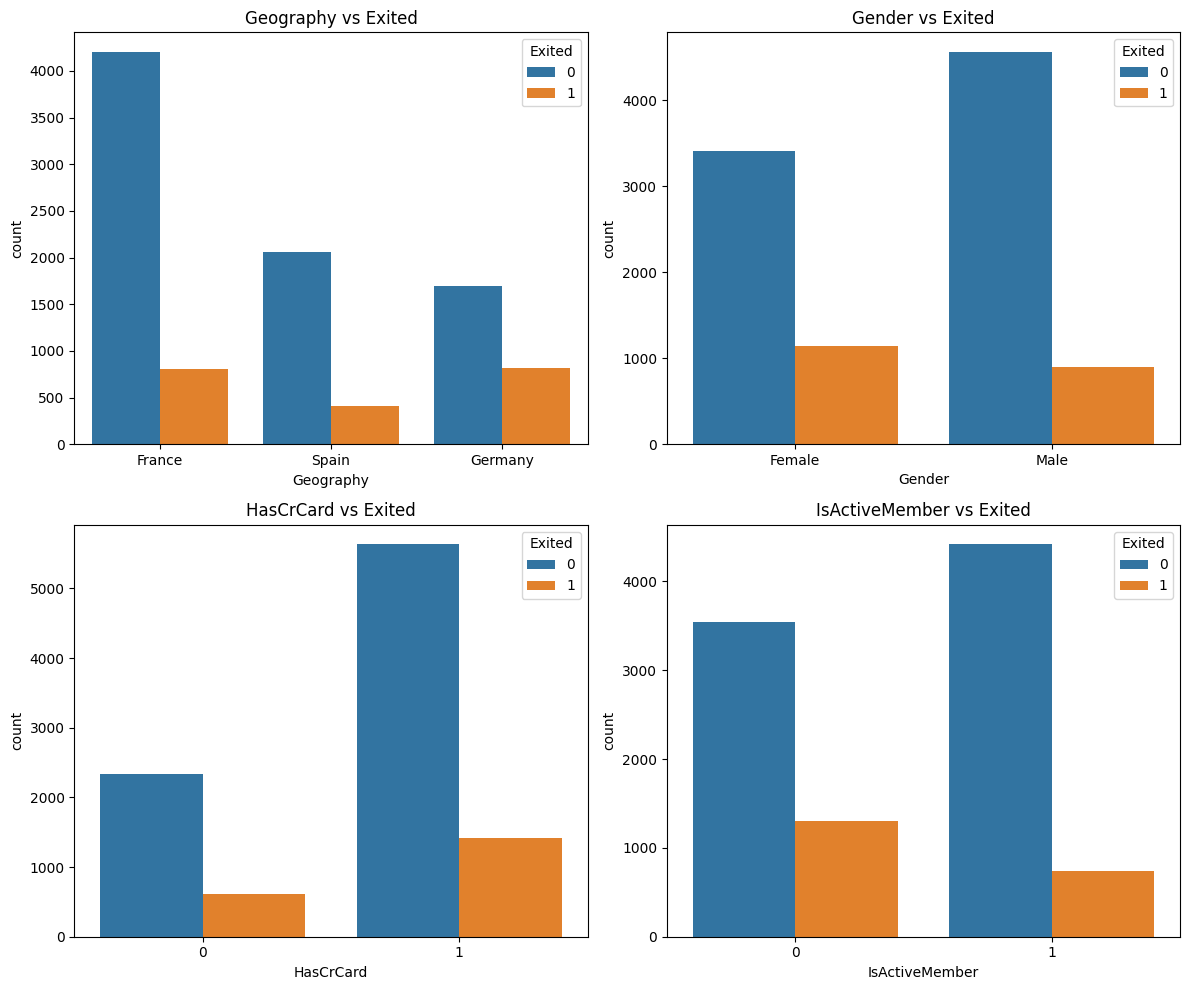

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Analyze categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')

        # Pie chart for percentage distribution
    plt.figure(figsize=(6, 6))  # Create a separate figure for pie chart
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'Percentage Distribution of {col}')
    plt.ylabel('')  # Remove y-axis label for pie chart
    plt.show()


plt.tight_layout()
plt.show()

# Class distribution of target variable
plt.figure(figsize=(6, 4))
df['Exited'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Exited')
plt.show()
print(f"Percentage of churned customers: {df['Exited'].value_counts(normalize=True)[1] * 100:.2f}%")

# Relationship between target variable and other features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

Normality test for CreditScore:
  K^2 statistic: 132.828
  P-value: 0.000
  Data for CreditScore is NOT normally distributed (reject null hypothesis)


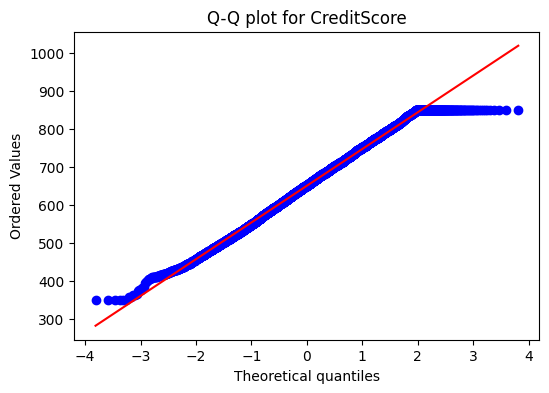

Normality test for Age:
  K^2 statistic: 1507.791
  P-value: 0.000
  Data for Age is NOT normally distributed (reject null hypothesis)


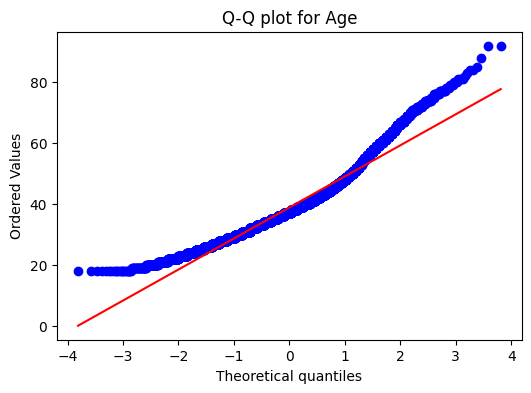

Normality test for Tenure:
  K^2 statistic: 6481.918
  P-value: 0.000
  Data for Tenure is NOT normally distributed (reject null hypothesis)


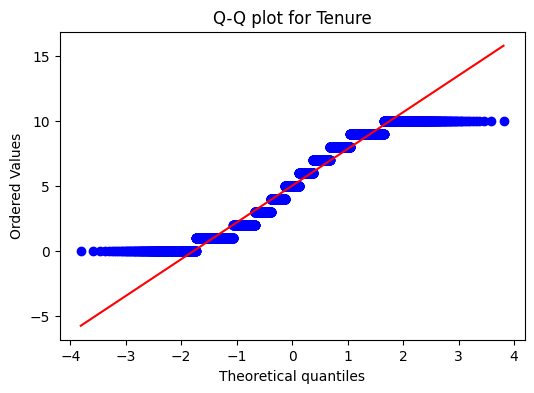

Normality test for Balance:
  K^2 statistic: 62973.390
  P-value: 0.000
  Data for Balance is NOT normally distributed (reject null hypothesis)


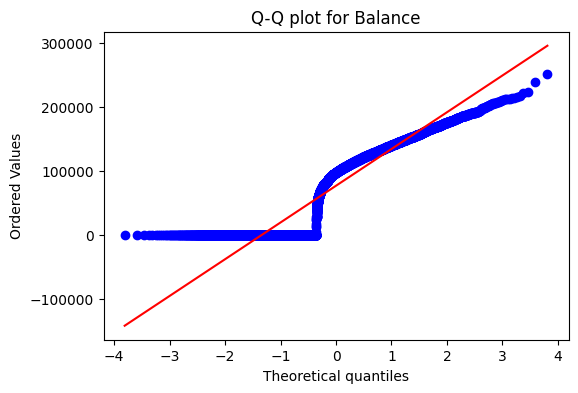

Normality test for NumOfProducts:
  K^2 statistic: 832.989
  P-value: 0.000
  Data for NumOfProducts is NOT normally distributed (reject null hypothesis)


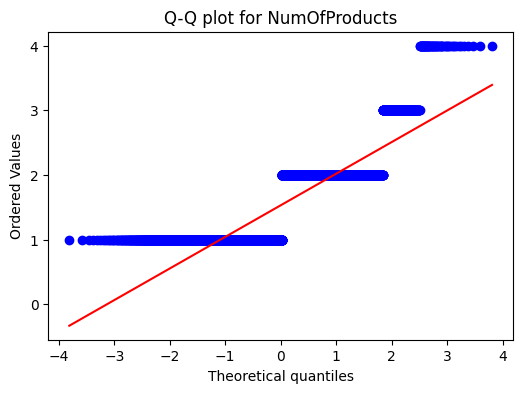

Normality test for EstimatedSalary:
  K^2 statistic: 7397.150
  P-value: 0.000
  Data for EstimatedSalary is NOT normally distributed (reject null hypothesis)


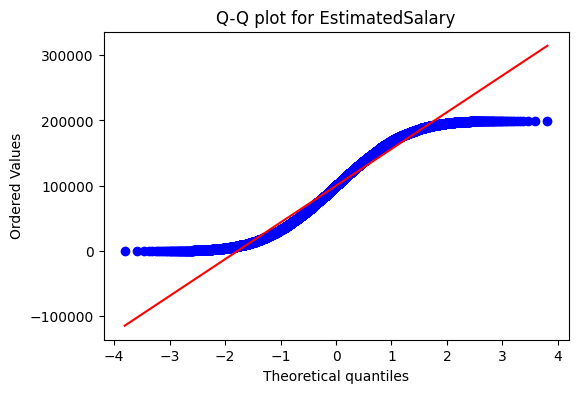

In [30]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# Assuming 'df' and 'numerical_features' are defined as in the previous code

alpha = 0.05  # Significance level

for col in numerical_features:
    k2, p = stats.normaltest(df[col])
    print(f"Normality test for {col}:")
    print(f"  K^2 statistic: {k2:.3f}")
    print(f"  P-value: {p:.3f}")

    if p < alpha:
        print(f"  Data for {col} is NOT normally distributed (reject null hypothesis)")
    else:
        print(f"  Data for {col} is normally distributed (fail to reject null hypothesis)")

    # Visualize the distribution with a Q-Q plot
    plt.figure(figsize=(6,4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {col}")
    plt.show()


In [31]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Create a LabelEncoder object
encoder = LabelEncoder()

# Loop through categorical features and apply label encoding
for col in categorical_features:
    df[col] = encoder.fit_transform(df[col])

# Display the updated DataFrame
display(df.head())

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], drop_first=True)

# Scale numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Rename scaled columns
scaled_numerical_features = [f"scaled_{col}" for col in numerical_features]
df = df.rename(columns=dict(zip(numerical_features, scaled_numerical_features)))

display(df.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


,scaled_CreditScore,scaled_Age,scaled_Tenure,scaled_Balance,scaled_NumOfProducts,scaled_EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.021886,1,False,False,False,True,True
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0.216534,0,False,True,False,False,True
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.240687,1,False,False,False,True,False
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-0.108918,0,False,False,False,False,False
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,-0.365276,0,False,True,False,True,True


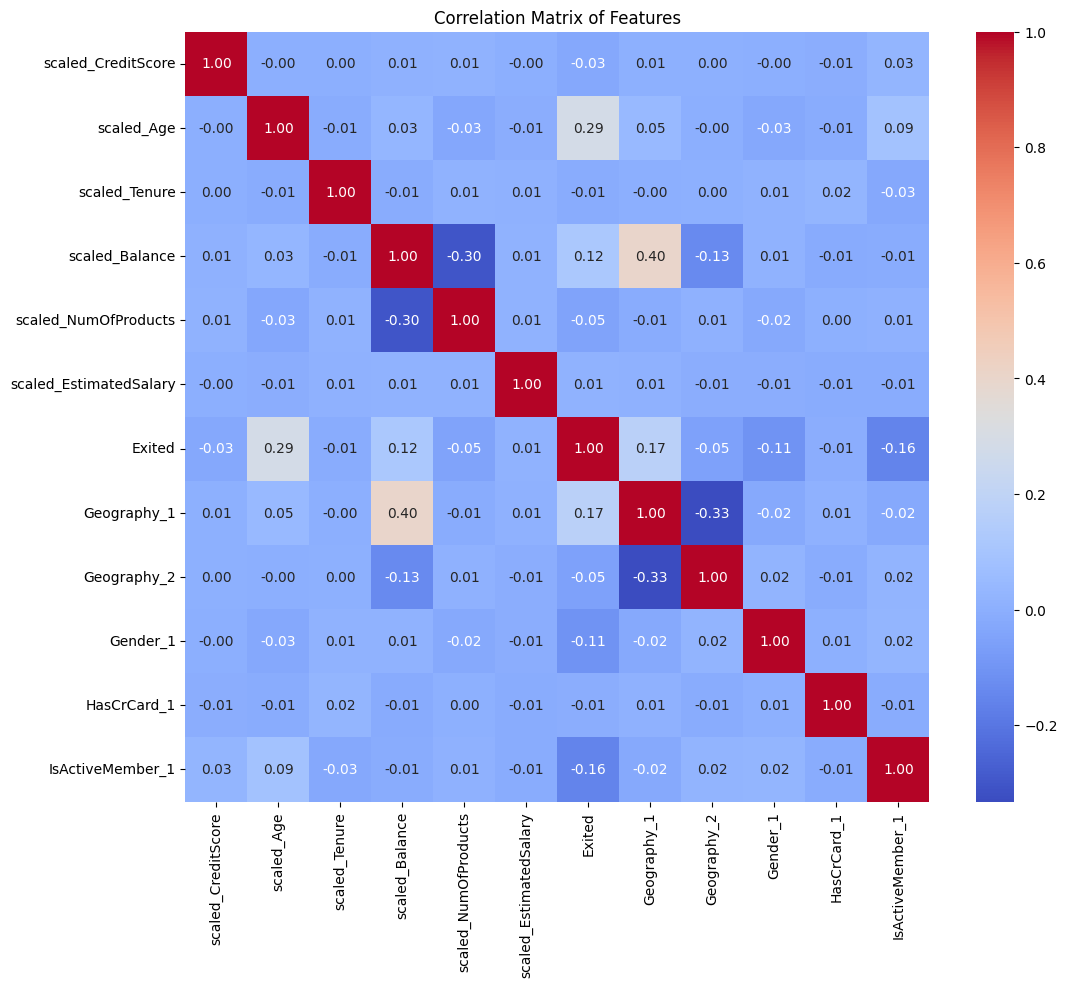

,scaled_CreditScore,scaled_Age,scaled_Tenure,scaled_Balance,scaled_NumOfProducts,scaled_EstimatedSalary,Exited,Geography_1,Geography_2,Gender_1,HasCrCard_1,IsActiveMember_1
scaled_CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384,-0.027094,0.005538,0.004780,-0.002857,-0.005458,0.025651
scaled_Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201,0.285323,0.046897,-0.001685,-0.027544,-0.011721,0.085472
scaled_Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784,-0.014001,-0.000567,0.003868,0.014733,0.022583,-0.028362
scaled_Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797,0.118533,0.401110,-0.134892,0.012087,-0.014858,-0.010084
scaled_NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204,-0.047820,-0.010419,0.009039,-0.021859,0.003183,0.009612
scaled_EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000,0.012097,0.010297,-0.006482,-0.008112,-0.009933,-0.011421
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,0.012097,1.000000,0.173488,-0.052667,-0.106512,-0.007138,-0.156128
Geography_1,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010297,0.173488,1.000000,-0.332084,-0.024628,0.010577,-0.020486
Geography_2,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.006482,-0.052667,-0.332084,1.000000,0.016889,-0.013480,0.016732
Gender_1,-0.002857,-0.027544,0.014733,0.012087,-0.021859,-0.008112,-0.106512,-0.024628,0.016889,1.000000,0.005766,0.022544


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

# Display the correlation matrix as a table
correlation_matrix


In [33]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Exited'] = y_resampled

# Display class distribution after SMOTE
print(df_resampled['Exited'].value_counts())


Exited
1    7963
0    7963
Name: count, dtype: int64


In [34]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame and 'correlation_matrix' is calculated as before
# ... (your existing code)

# Find highly correlated features (threshold of 0.8)
threshold = 0.8
highly_correlated_features = []

for col in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if abs(correlation_matrix.loc[col, index]) > threshold and col != index and index not in [x[0] for x in highly_correlated_features] and col not in [x[1] for x in highly_correlated_features]:
          highly_correlated_features.append((index, col))


if highly_correlated_features:
    print("Highly correlated features:")
    for pair in highly_correlated_features:
        print(f"  - {pair[0]} and {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")

else:
    print("No multicollinearity detected above the threshold.")


No multicollinearity detected above the threshold.


In [35]:
from sklearn.decomposition import PCA

# Assuming X_resampled is your feature matrix after SMOTE
X = df_resampled.drop('Exited', axis=1)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 80-85% of the variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1 #atleast 80%
n_components_max = np.argmax(cumulative_variance <= 0.85)  #atmost 85%

n_components = min(n_components, n_components_max + 1)


print("Number of components explaining 80-85% variance:", n_components)

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
X_pca_final = pca.fit_transform(X)

print("Shape of the transformed data:",X_pca_final.shape)


Number of components explaining 80-85% variance: 1
Shape of the transformed data: (15926, 1)


In [36]:
from sklearn.model_selection import train_test_split

# Assuming X_pca_final is your feature matrix after PCA and df_resampled['Exited'] is your target variable
X = X_pca_final
y = df_resampled['Exited']

# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # Split temp into 50% validation, 50% test

# Now you have:
# X_train, y_train (70% of the data)
# X_val, y_val (15% of the data)
# X_test, y_test (15% of the data)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (11148, 1)
Shape of y_train: (11148,)
Shape of X_val: (2389, 1)
Shape of y_val: (2389,)
Shape of X_test: (2389, 1)
Shape of y_test: (2389,)


In [37]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the models
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42, max_iter=1000),  # Increase max_iter if needed
    'DecisionTree': DecisionTreeClassifier(random_state=42)
}


# Perform cross-validation for each model
kfold = KFold(n_splits=5, shuffle=True, random_state=42) #5 fold crossvalidation
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"{name}: Mean accuracy = {np.mean(cv_scores):.4f} (std = {np.std(cv_scores):.4f})")

    #Fit the model
    model.fit(X_train,y_train)

RandomForest: Mean accuracy = 0.6299 (std = 0.0081)
AdaBoost: Mean accuracy = 0.7020 (std = 0.0159)
SVM: Mean accuracy = 0.6795 (std = 0.0074)
LogisticRegression: Mean accuracy = 0.6163 (std = 0.0079)
DecisionTree: Mean accuracy = 0.6296 (std = 0.0079)


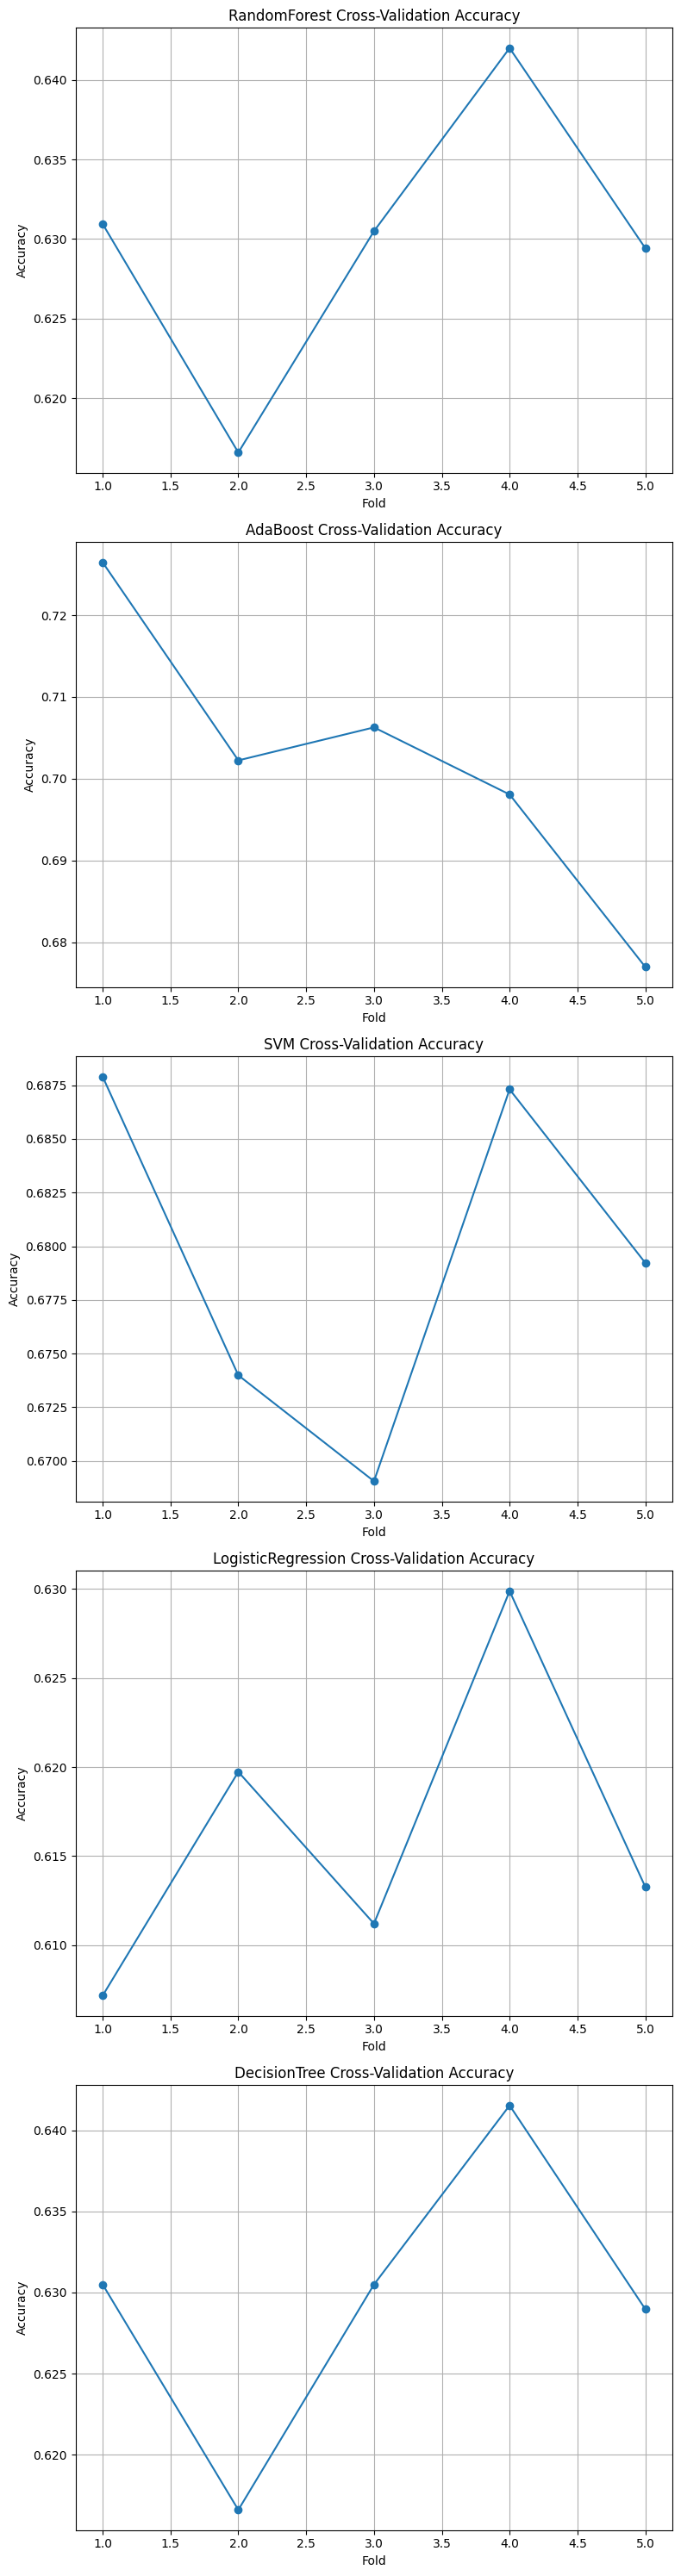

In [38]:
import matplotlib.pyplot as plt
# Perform cross-validation and store results
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results[name] = cv_scores

# Create subplots
fig, axes = plt.subplots(len(models), 1, figsize=(8, 6 * len(models)))  # Adjust figsize as needed

# Plot results for each model
for i, (name, scores) in enumerate(results.items()):
    axes[i].plot(range(1, len(scores) + 1), scores, marker='o')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel('Accuracy')
    axes[i].set_title(f'{name} Cross-Validation Accuracy')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


RandomForest validation Accuracy: 0.6254
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1215
           1       0.62      0.63      0.62      1174

    accuracy                           0.63      2389
   macro avg       0.63      0.63      0.63      2389
weighted avg       0.63      0.63      0.63      2389



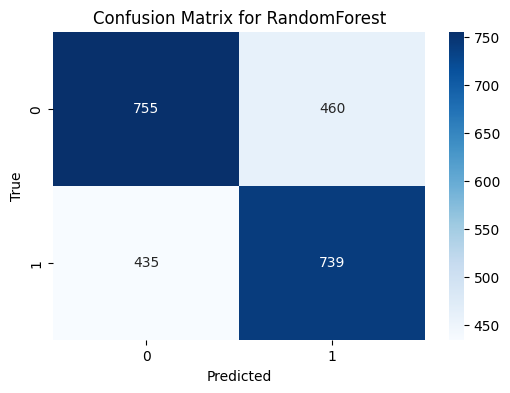

AdaBoost validation Accuracy: 0.7045
              precision    recall  f1-score   support

           0       0.77      0.60      0.67      1215
           1       0.66      0.81      0.73      1174

    accuracy                           0.70      2389
   macro avg       0.71      0.71      0.70      2389
weighted avg       0.72      0.70      0.70      2389



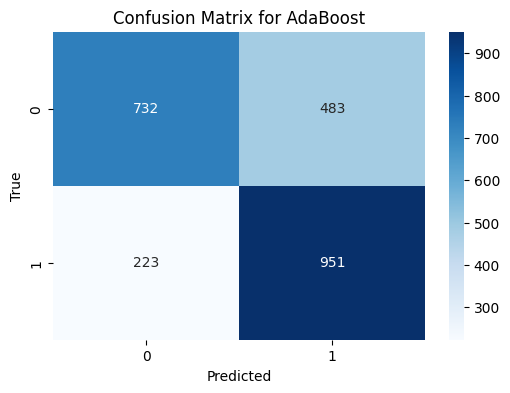

SVM validation Accuracy: 0.6731
              precision    recall  f1-score   support

           0       0.78      0.49      0.61      1215
           1       0.62      0.86      0.72      1174

    accuracy                           0.67      2389
   macro avg       0.70      0.68      0.66      2389
weighted avg       0.70      0.67      0.66      2389



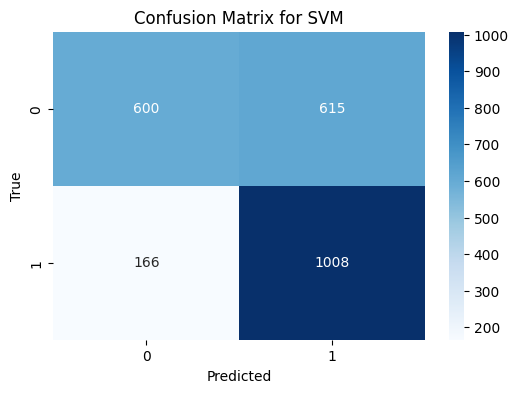

LogisticRegression validation Accuracy: 0.6166
              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1215
           1       0.59      0.70      0.64      1174

    accuracy                           0.62      2389
   macro avg       0.62      0.62      0.61      2389
weighted avg       0.62      0.62      0.61      2389



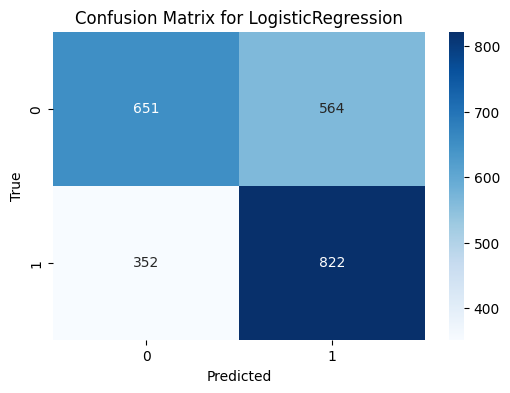

DecisionTree validation Accuracy: 0.6254
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1215
           1       0.62      0.63      0.62      1174

    accuracy                           0.63      2389
   macro avg       0.63      0.63      0.63      2389
weighted avg       0.63      0.63      0.63      2389



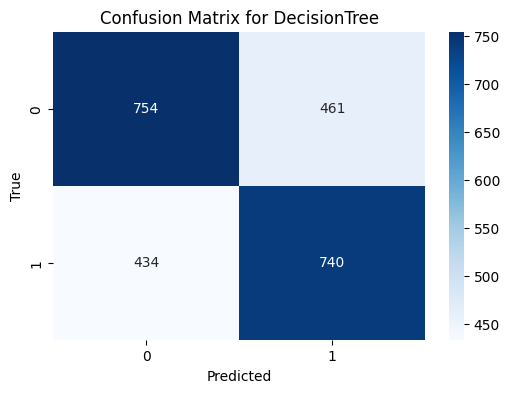

In [39]:
# Evaluate models on the validation set
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{name} validation Accuracy: {accuracy:.4f}")
    print(classification_report(y_val,y_pred))
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [40]:
# Evaluate models on the test set and find the best performing model
best_model = None
best_accuracy = 0

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = name

print(f"\nBest model: {best_model} with accuracy: {best_accuracy:.4f}")


RandomForest test Accuracy: 0.6429
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1211
           1       0.63      0.66      0.64      1178

    accuracy                           0.64      2389
   macro avg       0.64      0.64      0.64      2389
weighted avg       0.64      0.64      0.64      2389

AdaBoost test Accuracy: 0.6936
              precision    recall  f1-score   support

           0       0.75      0.59      0.66      1211
           1       0.66      0.80      0.72      1178

    accuracy                           0.69      2389
   macro avg       0.70      0.69      0.69      2389
weighted avg       0.70      0.69      0.69      2389

SVM test Accuracy: 0.6710
              precision    recall  f1-score   support

           0       0.78      0.49      0.60      1211
           1       0.62      0.86      0.72      1178

    accuracy                           0.67      2389
   macro avg       0.70      0.67   

In [41]:
# prompt: see is the best performing model is overfitting

# Assuming 'best_model' and 'models' are defined from the previous code
# ... (your existing code)

# Access the best-performing model
best_model_instance = models[best_model]

# Get training and validation predictions
train_pred = best_model_instance.predict(X_train)
val_pred = best_model_instance.predict(X_val)

# Calculate training and validation accuracies
train_accuracy = accuracy_score(y_train, train_pred)
val_accuracy = accuracy_score(y_val, val_pred)

print(f"Training accuracy of {best_model}: {train_accuracy}")
print(f"Validation accuracy of {best_model}: {val_accuracy}")

# Check for overfitting
if train_accuracy - val_accuracy > 0.1 : #define threshold for overfitting
    print(f"The {best_model} model may be overfitting the training data.")
else:
    print(f"The {best_model} model does not appear to be significantly overfitting.")


Training accuracy of AdaBoost: 0.713222102619304
Validation accuracy of AdaBoost: 0.7044788614483047
The AdaBoost model does not appear to be significantly overfitting.


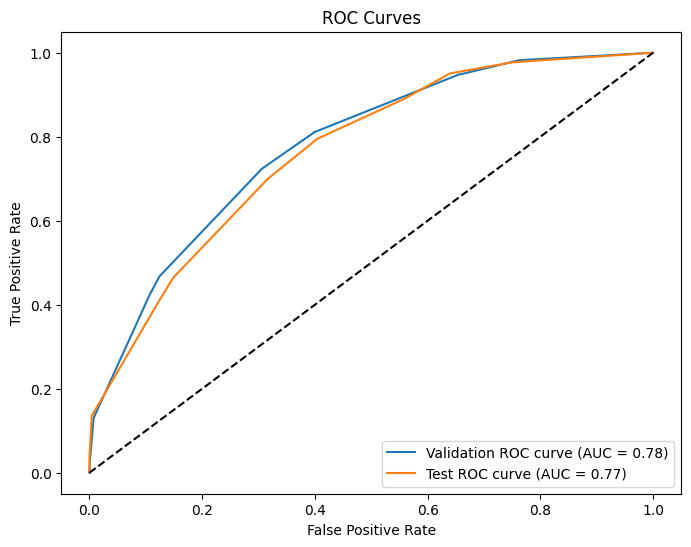

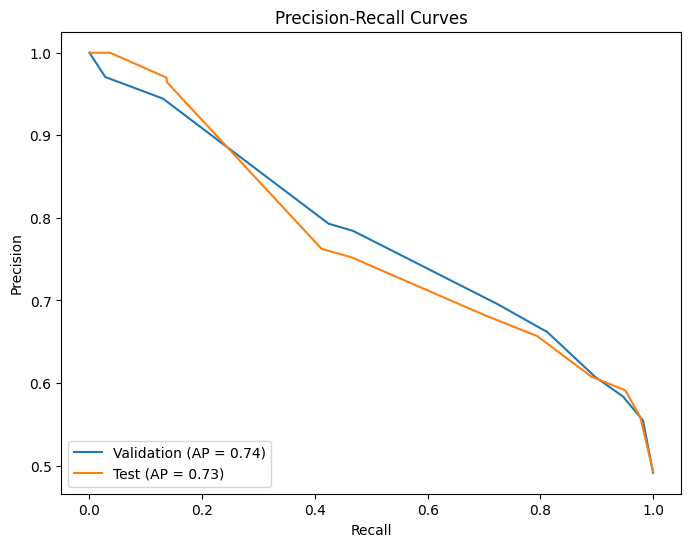

In [44]:
# prompt: make roc and Aoc and avg precision recall curve

from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Assuming 'best_model_instance', 'X_val', 'y_val', 'X_test', 'y_test' are defined
# ... (your existing code)

# Predict probabilities for the best model
y_val_prob = best_model_instance.predict_proba(X_val)[:, 1]  # Probability of class 1
y_test_prob = best_model_instance.predict_proba(X_test)[:, 1]


# ROC Curve
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_prob)
roc_auc_val = auc(fpr_val, tpr_val)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, label=f'Validation ROC curve (AUC = {roc_auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


# Average Precision Recall Curve
precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_prob)
avg_precision_val = average_precision_score(y_val, y_val_prob)

precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_prob)
avg_precision_test = average_precision_score(y_test, y_test_prob)


plt.figure(figsize=(8, 6))
plt.plot(recall_val, precision_val, label=f'Validation (AP = {avg_precision_val:.2f})')
plt.plot(recall_test, precision_test, label=f'Test (AP = {avg_precision_test:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc='lower left')
plt.show()
